# Descripción
Se explorará un conjunto de datos de automóviles de aproximadamente $10\times 10,000$ entradas, con datos cómo tipo de motor, tamaño del motor, tipo de transmisión, etc.

In [380]:
# Se importan las librerías necesarias.
#   Para manejo de datos
import  pandas as pd
import  numpy  as np
#   Para vizualización
import seaborn as sns
import matplotlib.pyplot as plt
# Configuraciones iniciales
plt.rcParams['figure.figsize'] = [10, 6]
sns.set(color_codes=True)

In [381]:
# Se cargan los datos en un data frame
datos_carros = pd.read_csv('Data/data.csv')
print(datos_carros.shape)
datos_carros.head()

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Según la fuente de los datos, cada columna representa lo siguiente
| Etiqueta          | Significado                     |
|-------------------|---------------------------------|
| Make              | Marca del auto                  |
| Model             | Modelo del auto                 |
| Year              | Año de fabricación              |
| Engine Fuel Type  | Tipo de motor de combustible    |
| Engine HP         | Caballos de fuerza del motor    |
| Engine Cylinders  | Cilindros del motor             |
| Transmission Type | Tipo de transmisión             |
| Driven_Wheels     | Ruedas motrices                 |
| Number of Doors   | Número de puertas               |
| Maerket Category  | Categoría del mercado           |
| Vehicle Size      | Tamaño                          |
| Vehicle Style     | Estilo                          |
| Highway MPG       | Millas por segundo en carretera |
| city mpg          | Millas por segundo en ciudad    |
| Popularity        | Popularidad                     |
| MSRP              | Precio de venta sugerido        |

Se tienen dos tipos de variables: categóricas y numéricas. Éste análisis gira en torno a la popularidad y el MSRP, ciertamente es útil tomar diferentes perspectivas de relacion $x$ a $y$, por lo que separarémos las entradas categóricas de las numéricas.

In [382]:
datos_num = datos_carros.select_dtypes(exclude=['object']).drop(['Popularity'], axis=1)
datos_cat = datos_carros.select_dtypes(include=['object'])
datos_cat.insert(1,'MSRP',datos_carros['MSRP'],True)
print(datos_num.columns)
print(datos_cat.columns)

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'MSRP'],
      dtype='object')
Index(['Make', 'MSRP', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')


## Trabajando con variables numéricas

In [383]:
# Revisamos entradas vacías y eliminamos filas duplicadas
print(datos_num.isnull().sum())
datos_num = datos_num.drop_duplicates()
print(datos_num.shape)

Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64
(10888, 7)


La cantidad de valores nulos es minima comparado con la muestra, entonces se borran esas filas

In [384]:
datos_num = datos_num.dropna()
print(datos_num.shape)
datos_num.head()

(10789, 7)


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
0,2011,335.0,6.0,2.0,26,19,46135
1,2011,300.0,6.0,2.0,28,19,40650
2,2011,300.0,6.0,2.0,28,20,36350
3,2011,230.0,6.0,2.0,28,18,29450
4,2011,230.0,6.0,2.0,28,18,34500


Con esto, comenzamos a ver las posibles correcciones respecto a datos atípicos

<AxesSubplot:xlabel='MSRP'>

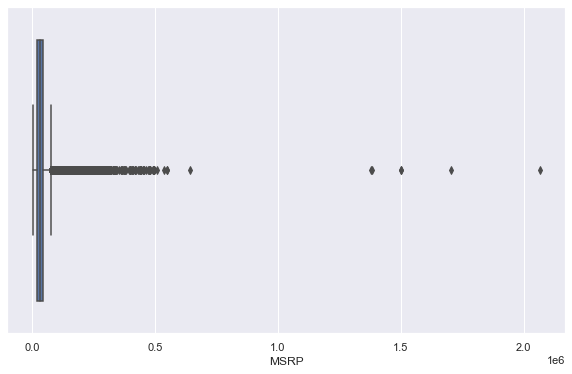

In [385]:
sns.boxplot(x=datos_num['MSRP'])

<AxesSubplot:xlabel='Engine HP'>

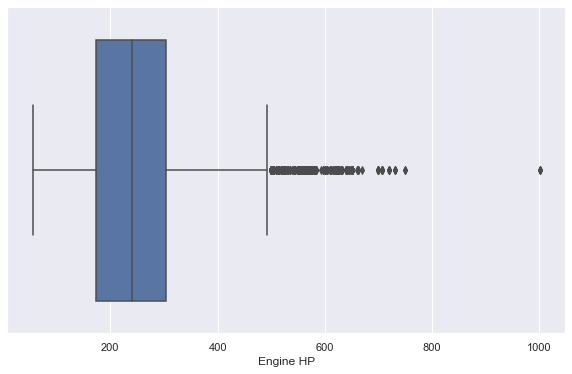

In [386]:
sns.boxplot(x=datos_num['Engine HP'])

<AxesSubplot:xlabel='Engine Cylinders'>

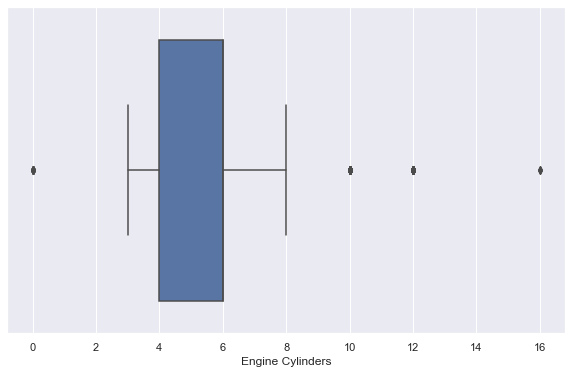

In [387]:
sns.boxplot(x=datos_num['Engine Cylinders'])

Se observa que en la columna MSRP la cantidad de datos atípicos es mayor

In [388]:
Q1 = datos_num.quantile(0.25)
Q3 = datos_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    9.0
Engine HP             130.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
MSRP                21355.0
dtype: float64


In [389]:
aux = (datos_num < (Q1 - 1.5 * IQR)) |(datos_num > (Q3 + 1.5 * IQR))
datos_num = datos_num[~(aux).any(axis=1)]
datos_num.shape

(9154, 7)

<AxesSubplot:>

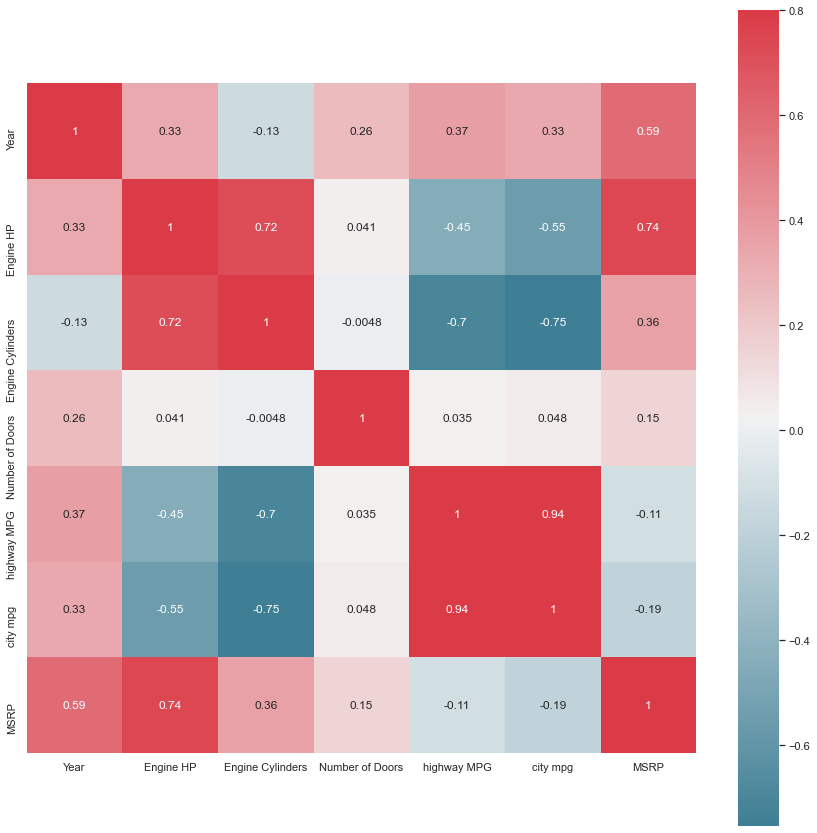

In [390]:
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(222, 10, as_cmap=True)
sns.heatmap(datos_num.corr(), annot=True, vmax=.8, square=True, cmap=cmap)

Es posible ver que las columnas con mayor correlación al precio son: Year, Engine HP y Engine Cylinders. Se proceden a eliminar las columnas con menos impacto

In [391]:
datos_num = datos_num.drop(['Number of Doors', 'highway MPG', 'city mpg'], axis=1)

## Trabajando con variables categóricas
Se limpiarán los datos como en el caso de las variables numéricas, pero dicho proceso se obviará.

In [392]:
print(datos_cat.shape)
datos_cat = datos_cat.drop_duplicates()
datos_cat = datos_cat.dropna()
print(datos_cat.shape)
datos_cat.head()

(11914, 9)
(7039, 9)


,Make,MSRP,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,46135,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,40650,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,36350,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,29450,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,34500,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


In [393]:
for column in datos_cat.drop(['MSRP'],axis=1):
    aux = datos_cat[column].unique()
    print('{}: {}'.format(column,len(aux)))

Make: 48
Model: 723
Engine Fuel Type: 9
Transmission Type: 5
Driven_Wheels: 4
Market Category: 71
Vehicle Size: 3
Vehicle Style: 16


La cantidad desproporcionada de categorías en la columna Model hará que sea difícil de generalizar un modelo y a su vez, los modelos implementados serán lentos, algo similar pasa con la categoría Market Category. Se borrarán ambas columnas para poder aplicar One-Hot Encoding

In [394]:
datos_cat = datos_cat.drop(['Model', 'Market Category'],axis=1)
datos_cat.shape

(7039, 7)

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(datos_cat.drop(['MSRP'],axis=1), datos_cat['MSRP'])

Por la cantidad de valores unicos en la columna Make, se realizará un OHE separado.

In [396]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train.drop(['Make'],axis=1)))

OH_cols_train.index = X_train.index


<AxesSubplot:>

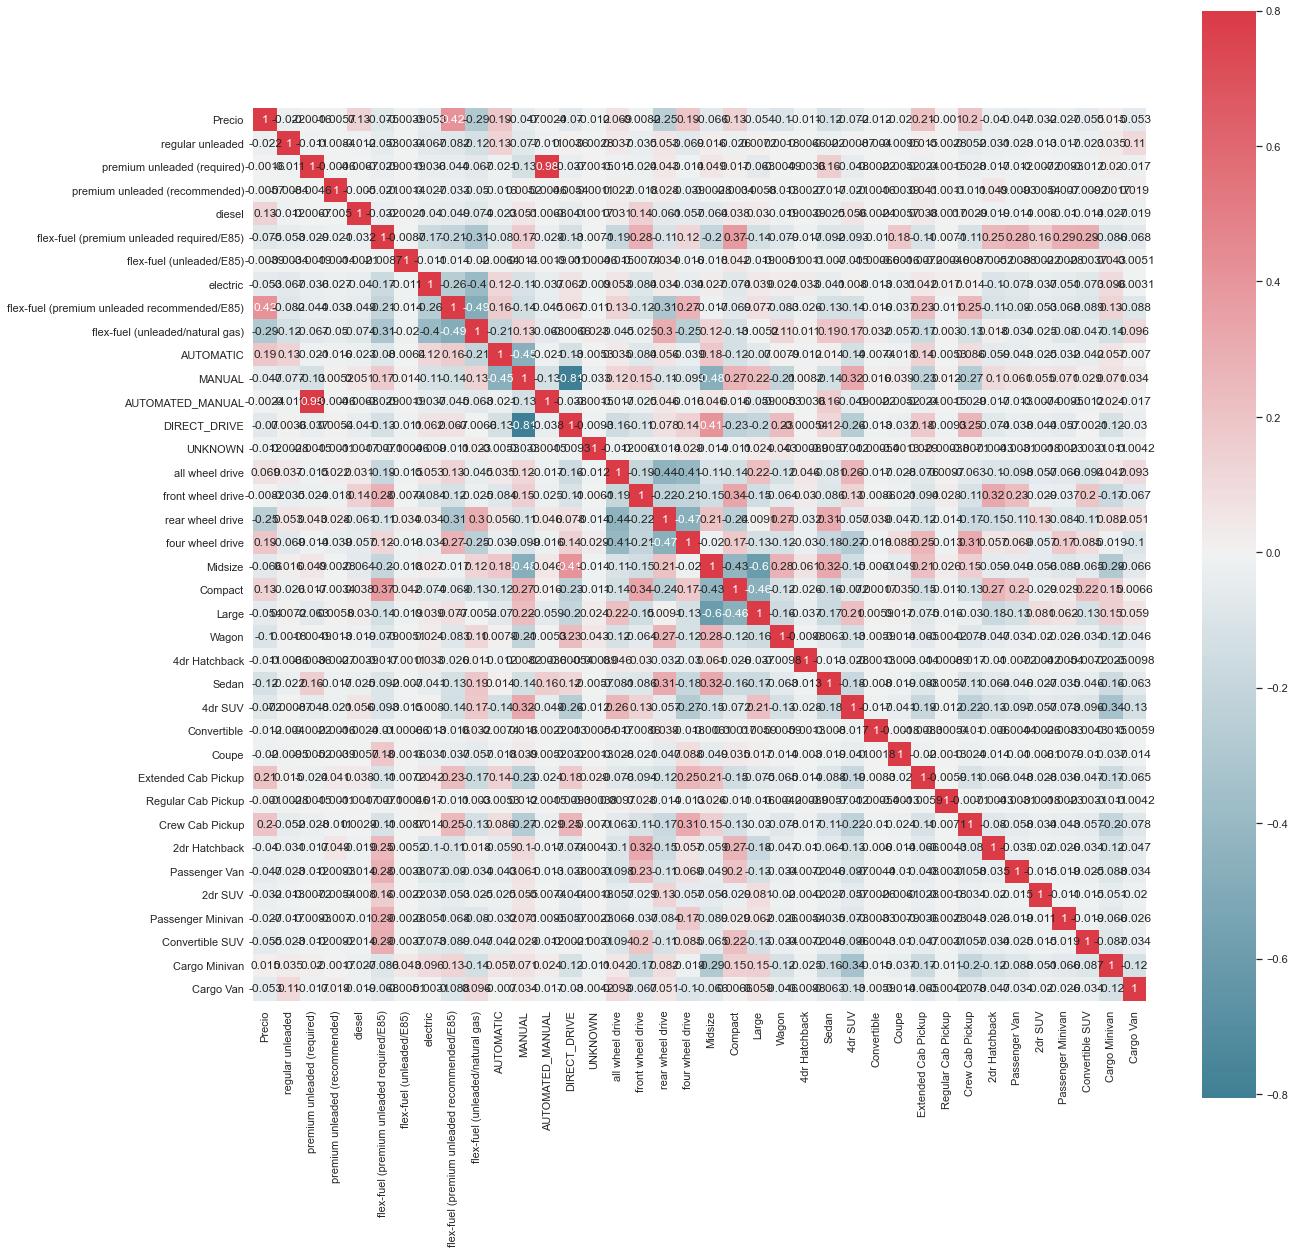

In [397]:
OH_cols_train.insert(0,'Precio',y_train,True)
unicos = ['Precio']
for column in X_train.drop(['Make'],axis=1):
    unicos.extend(list(X_train[column].unique()))

OH_cols_train.columns = unicos
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(222, 10, as_cmap=True)
sns.heatmap(OH_cols_train.corr(), annot=True, vmax=.8, square=True, cmap=cmap)

Se observa que hay mayor correlación con el tipo de motor, es decir, la categoría Engine Fuel Type.

Realizando OHE para la categoría Make

In [398]:
d1 = X_train['Make'].values.reshape(-1,1)

OH_cols_train_make = pd.DataFrame(OH_encoder.fit_transform(d1))

OH_cols_train_make.index = X_train.index


<AxesSubplot:>

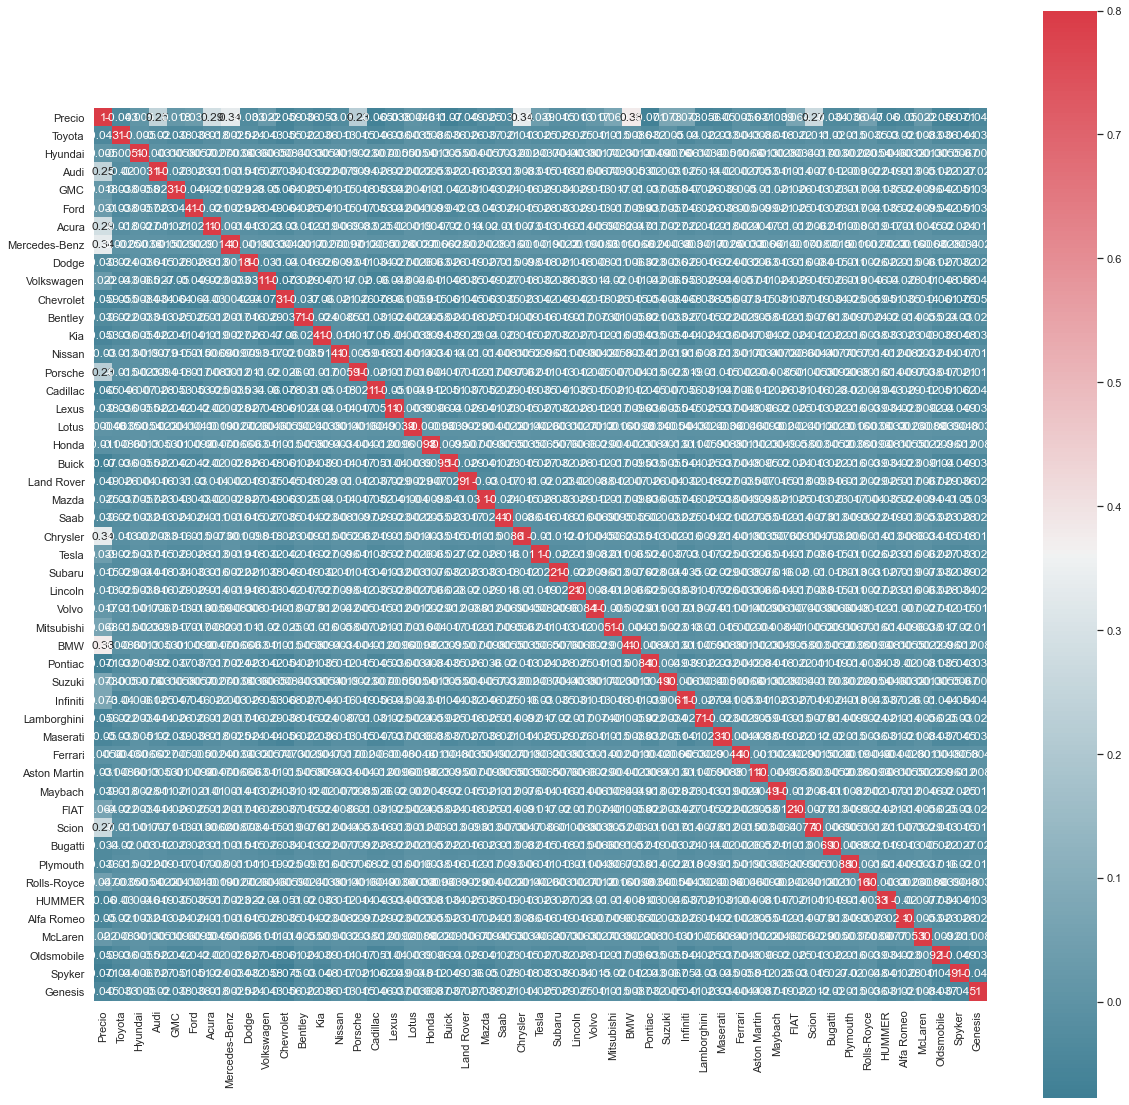

In [399]:
OH_cols_train_make.insert(0,'Precio',y_train,True)
unicos = ['Precio']
unicos.extend(list(X_train['Make'].unique()))

    
OH_cols_train_make.columns = unicos
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(222, 10, as_cmap=True)
sns.heatmap(OH_cols_train_make.corr(), annot=True, vmax=.8, square=True, cmap=cmap)

No hay ninguna correlación substancial entre la marca del auto y el precio sugerido de venta.

# Preparación para el modelo
Del análisis anterior, las variables que tienen relación con el precio sugerido de venta son:
- Year,
- Engine Fule Type,
- Engine HP y
- Engine Cylinders

Con base a lo anterior, se generará un árbol de regresión para las variables numéricas y otro para todas las variables.

In [400]:
X_train, X_valid, y_train, y_valid = train_test_split(datos_num, datos_num['MSRP'])

In [401]:
from sklearn.tree import DecisionTreeRegressor
DTR_1 = DecisionTreeRegressor(random_state=0)
DTR_1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [402]:
pred_dtr_1= DTR_1.predict(X_valid)
DTR_1.score(X_valid,y_valid)

0.9999951031089287

(1668.1755310590163, 90278.26940033943, 1668.1755310590163, 90278.26940033943)

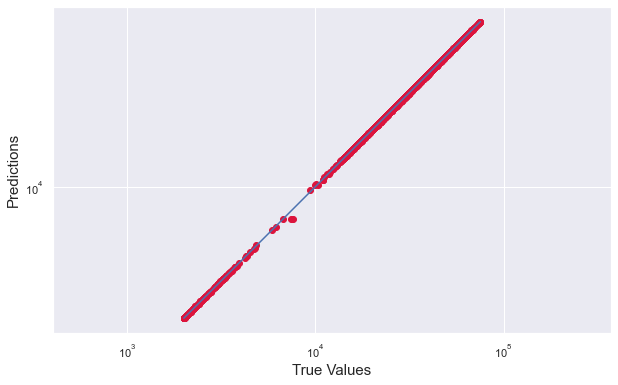

In [403]:
plt.scatter(y_valid, pred_dtr_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_dtr_1), max(y_valid))
p2 = min(min(pred_dtr_1), min(y_valid))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [404]:
datos_mezclados = pd.DataFrame({
    'Año': datos_carros['Year'],
    'Tipo de motor': datos_carros['Engine Fuel Type'],
    'HP': datos_carros['Engine HP'],
    'Cilindros': datos_carros['Engine Cylinders'],
    'Precio': datos_carros['MSRP']
})

datos_mezclados = datos_mezclados.drop_duplicates()
datos_mezclados = datos_mezclados.dropna()

Q1 = datos_mezclados.quantile(0.25)
Q3 = datos_mezclados.quantile(0.75)
IQR = Q3 - Q1

aux = (datos_mezclados < (Q1 - 1.5 * IQR)) |(datos_mezclados > (Q3 + 1.5 * IQR))
datos_mezclados = datos_mezclados[~(aux).any(axis=1)]
print(datos_mezclados.shape)
datos_mezclados.head()

(9133, 5)


,Año,Tipo de motor,HP,Cilindros,Precio
0,2011,premium unleaded (required),335.0,6.0,46135
1,2011,premium unleaded (required),300.0,6.0,40650
2,2011,premium unleaded (required),300.0,6.0,36350
3,2011,premium unleaded (required),230.0,6.0,29450
4,2011,premium unleaded (required),230.0,6.0,34500


In [405]:
X_train, X_valid, y_train, y_valid = train_test_split(datos_mezclados.drop(['Precio'], axis=1), datos_mezclados['Precio'])

In [406]:
d1 = X_train['Tipo de motor'].values.reshape(-1,1)
d2 = X_valid['Tipo de motor'].values.reshape(-1,1)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(d1))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(d2))


# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

In [407]:

OH_cols_train.columns = X_train['Tipo de motor'].unique()
OH_cols_valid.columns = X_valid['Tipo de motor'].unique()

In [408]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(['Tipo de motor'], axis=1)
num_X_valid = X_valid.drop(['Tipo de motor'], axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.head()

,Año,HP,Cilindros,regular unleaded,premium unleaded (recommended),flex-fuel (unleaded/E85),premium unleaded (required),diesel,flex-fuel (premium unleaded recommended/E85),natural gas,flex-fuel (premium unleaded required/E85)
11005,2016,310.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4098,2017,268.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5157,2010,328.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4322,2016,365.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7256,2011,210.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [409]:
DTR_2 = DecisionTreeRegressor(random_state=0)
DTR_2.fit(OH_X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [416]:
pred_dtr_2 = DTR_2.predict(OH_X_valid)
DTR_2.score(OH_X_valid, y_valid)

c:\Users\Germain\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Germain\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.8826393186675215

(1667.9929727655272, 90485.99272559193, 1667.9929727655272, 90485.99272559193)

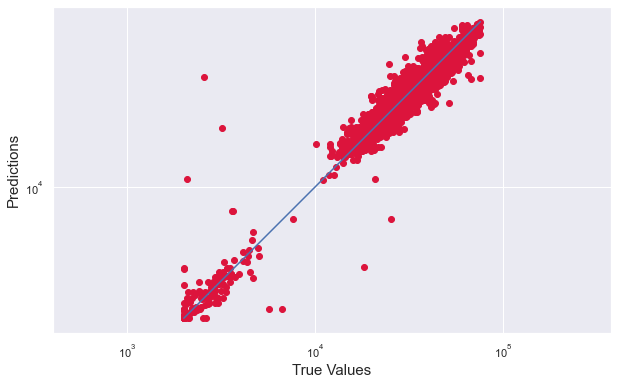

In [417]:
plt.scatter(y_valid, pred_dtr_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_dtr_2), max(y_valid))
p2 = min(min(pred_dtr_2), min(y_valid))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

# Conclusión
El modelo que contiene variables categóricas se desempeña peor que el que incluye únicamente variables numéricas, regresando a la gráfica de correlación es posible notar el por qué; pues a pesar de que existe una pequeña correlación en esa categoría, no es lo suficientmeente grande como para que tenga impacto.

In [419]:
from joblib import dump
dump(DTR_1,'modelo/DTRegressor.joblib')

['modelo/DTRegressor.joblib']